In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 1/happy or sad.zip'

In [4]:
import os
import base64
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img

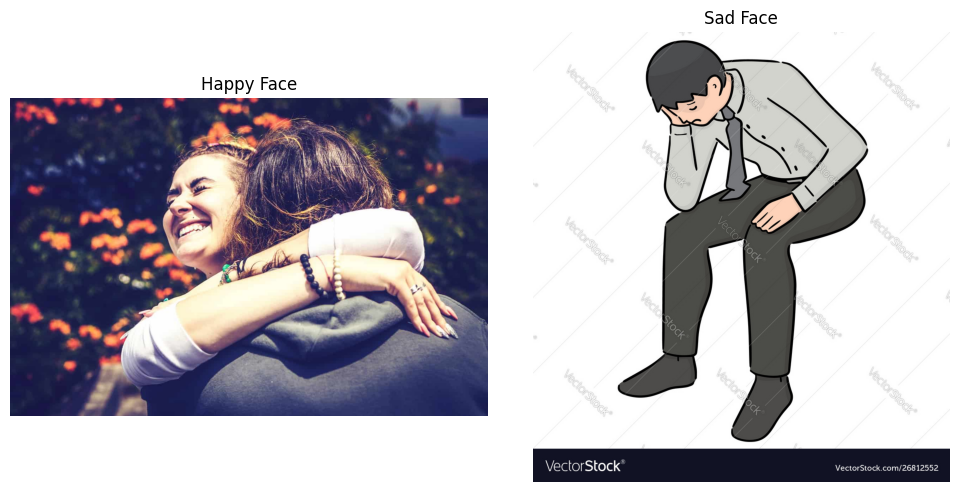

In [30]:
# Set up directories
BASE_DIR = "/content/data"
happy_dir = os.path.join(BASE_DIR, "happy")
sad_dir = os.path.join(BASE_DIR, "sad")

# Get first image from each directory
happy_example = os.path.join(happy_dir, os.listdir(happy_dir)[22])
sad_example = os.path.join(sad_dir, os.listdir(sad_dir)[40])

# Create plot
plt.figure(figsize=(10, 5))

# Plot happy face
plt.subplot(1, 2, 1)
plt.imshow(load_img(happy_example))
plt.title('Happy Face')
plt.axis('off')

# Plot sad face
plt.subplot(1, 2, 2)
plt.imshow(load_img(sad_example))
plt.title('Sad Face')
plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:

base_dir = '/content/data'
bad_file = 0
# Loop through train and test folders
for category in ['happy', 'sad']:
    folder_path = os.path.join(base_dir, category)
    print(f"Checking images in: {folder_path}")
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            # Try to read and decode image with tensorflow
            img = tf.io.read_file(file_path)
            img = tf.image.decode_image(img, channels=3)  # Attempt to decode as RGB
        except tf.errors.InvalidArgumentError:
            # If decoding fails, it's likely a corrupt image
            bad_file += 1
            print(f"Deleting corrupt image: {file_path}")
            os.remove(file_path)
print("Cleaning complete! All unreadable images have been removed.")

Checking images in: /content/data/happy
Deleting corrupt image: /content/data/happy/3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Deleting corrupt image: /content/data/happy/o-HAPPY-facebook.jpg
Checking images in: /content/data/sad
Deleting corrupt image: /content/data/sad/44861512-smiling-man-in-a-crowd-of-sad-people.jpg
Deleting corrupt image: /content/data/sad/sad-people-group-therapy-session_23-2148752071.jpg
Deleting corrupt image: /content/data/sad/sad-people-chairs-group-therapy-session_23-2148752072.jpg
Deleting corrupt image: /content/data/sad/50740738-portrC3A4ts-der-traurige-menschen.jpg
Cleaning complete! All unreadable images have been removed.


In [11]:
print(f'[{bad_file}] bad files were removed successfully')

[6] bad files were removed successfully


In [13]:
# Load the first example of a happy face
sample_image  = tf.keras.utils.load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = tf.keras.utils.img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (377, 740, 3)
The maximum pixel value used is: 255.0


In [14]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.999:
            self.model.stop_training = True
            print("\nReached 99.9% accuracy so cancelling training!")



callbacks = EarlyStoppingCallback()

In [16]:
# GRADED FUNCTION: training_dataset

def training_dataset():
    """Creates the training dataset out of the training images. Pixel values should be normalized.

    Returns:
        tf.data.Dataset: The dataset including the images of happy and sad faces.
    """

    ### START CODE HERE ###

    # Specify the function to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data.
    #              You may hardcode this or use the previously defined global variable.
    # - image_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "int".
    #               Pick the one that better suits here given that the labels can only be two different values.
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        BASE_DIR,
        image_size=(300,300),
        batch_size=16,
        label_mode='binary'
    )

    # Define the rescaling layer (passing in the appropriate parameters)
    rescale_layer = tf.keras.layers.Rescaling(1./255)

    # Apply the rescaling by using the map method and a lambda
    train_dataset_scaled = train_dataset.map(lambda images, labels: (rescale_layer(images), labels))

    ### END CODE HERE ###

    return train_dataset_scaled

In [17]:
# Save your generator in a variable
train_data = training_dataset()

for images, labels in train_data.take(1):
    print(f"Range for pixel values: {np.min(images[0]), np.max(images[0])}")

print(f"train_data is an instance of tf.data.Dataset: {isinstance(train_data, tf.data.Dataset)}")

Found 162 files belonging to 2 classes.
Range for pixel values: (np.float32(0.06491505), np.float32(1.0))
train_data is an instance of tf.data.Dataset: True


In [18]:
def create_and_compile_model():
    """Creates, compiles and trains the model to predict happy from sad faces.

    Returns:
        tf.keras.Model: The model that will be trained to predict predict happy and sad faces.
    """

    ### START CODE HERE ###

    # Define the model
    model = tf.keras.models.Sequential([
		    tf.keras.Input(shape=(300, 300, 3)),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')

    ])

    # Compile the model
    # Remember to set an appropriate loss function, optimizer and metrics
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    ### END CODE HERE ###

    return model

In [19]:
# Save untrained model in a variable
model = create_and_compile_model()


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    40,141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Get the training history from your model
training_history = model.fit(
	  train_data,
    epochs=15,
    callbacks=[callbacks]
)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6360 - loss: 1.7147
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7375 - loss: 0.6061
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7246 - loss: 0.5156
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9366 - loss: 0.2413
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9251 - loss: 0.1805
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9868 - loss: 0.0638
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9837 - loss: 0.0414
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0173
Reached 99.9% accuracy so cancelling training!
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0175


Saving person-2579938_640.jpg to person-2579938_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
person-2579938_640.jpg: happy (confidence: 0.55)


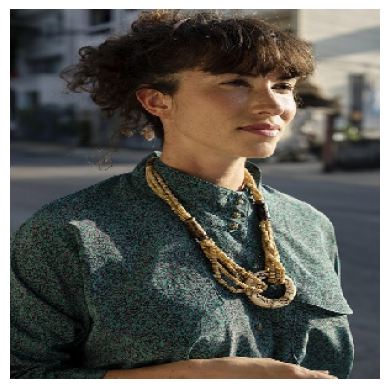

In [31]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the first uploaded file

# Load and preprocess image
img = load_img(image_path, target_size=(300, 300))
img_array = img_to_array(img) / 255.0  # Normalize in one step
img_batch = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_batch)[0][0]  # Get single probability
emotion = "happy" if prediction > 0.5 else "sad"

# Display result
print(f"{image_path}: {emotion} (confidence: {prediction:.2f})")
plt.imshow(img)
plt.axis('off')
plt.show()